In [6]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from textwrap import wrap


data_df = pd.read_csv('diabetes_data_upload.csv')

# Convert data frame to numpy array
data = data_df.to_numpy()

data_df[:10]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


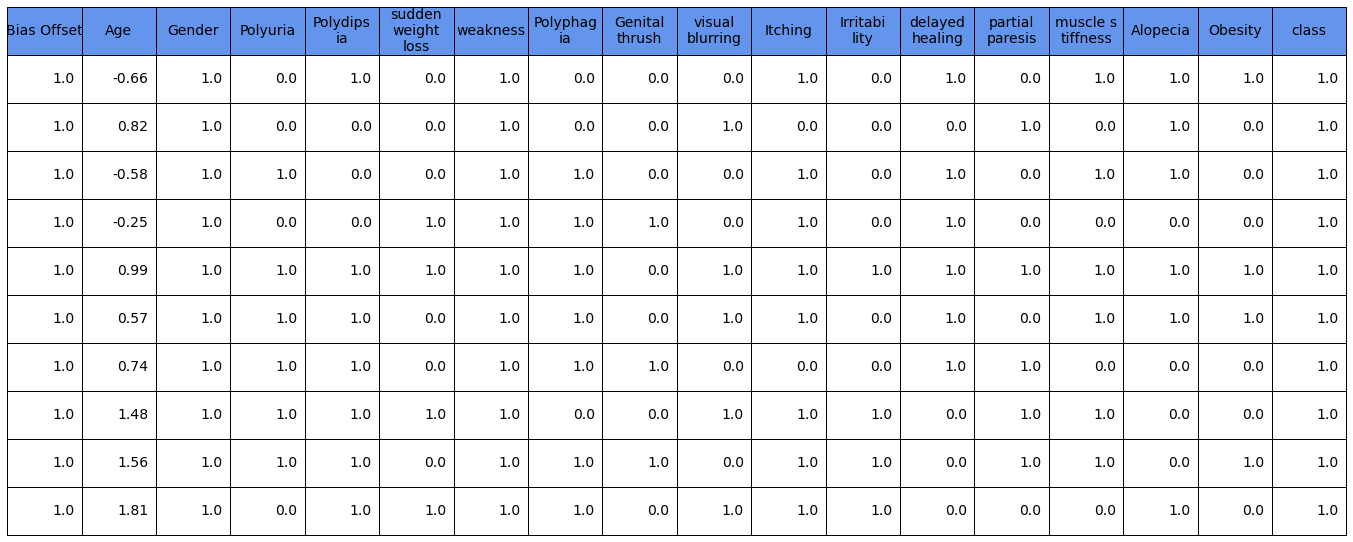

In [7]:
# reset data array incase cell is ran multiple times
data = data_df.to_numpy()

# Calculate average
age_mu = sum(data[:,0])/len(data[:,0])

# Calculate standard deviation
age_sigma = np.sqrt((1/len(data[:,0]))*sum((data[:,0] - age_mu)**2))

# Calculate standardized age
age_stand = (data[:,0] - age_mu)/age_sigma

# Replace the age with the standardized age
data[:,0] = age_stand

# Change text to a 1 or 0
for i in range(len(data[:,0])):
    for j, value in enumerate(data[i,:]):
        # Change true, yes, positive, and male to a 1
        if (value == 'True') or (value == 'Yes') or (value == 'Positive') or (value == 'Male'):
            data[i,j] = 1
        # Change no, negative, female to a 0
        elif (value == 'No') or (value == 'Negative') or (value == 'Female'):
            data[i,j] = 0

# Add a column of ones for the bias
data = np.c_[np.ones(data.shape[0]), data]

# Round the data to fit the table
data = np.round(np.array(data, np.float32), 2)


# Display data in a table
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# Add column names
label = ['\n'.join(wrap(l, 8)) for l in data_df.columns]

# Name the bias column of 1s
label = ["Bias Offset"] + label

table = plt.table(cellText = data[:10,:], 
                  colLabels = label, 
                  colColours=["cornflowerblue"]*len(data[0,:]), 
                  loc = 'center')

table.scale(4,4)
table.auto_set_font_size(False)
table.set_fontsize(14)

Model F1 Score: 0.98


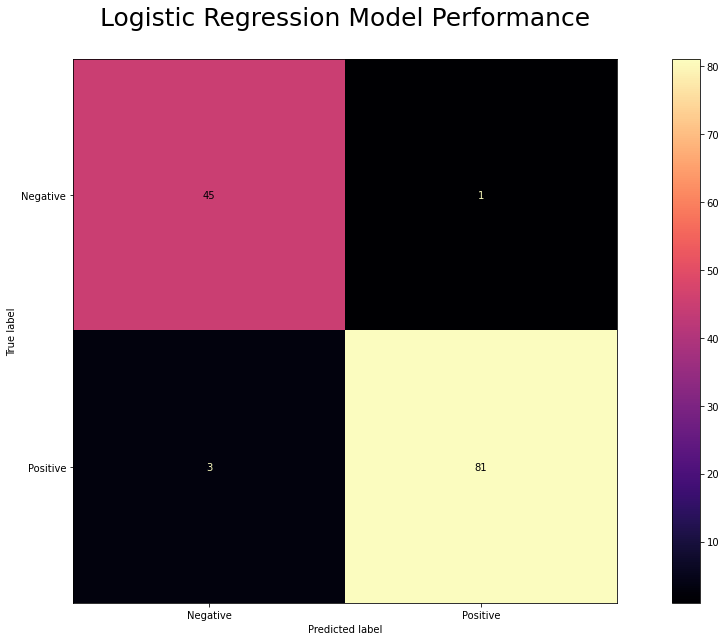

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(data[:,:-1], data[:,-1], train_size=0.75, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_hat = clf.predict(X_test)

print(f"Model F1 Score: {np.round(f1_score(y_test, y_hat),2)}")

labels = ['test1', 'test2']
displabels = ['Negative', 'Positive']

fig, ax = plt.subplots(1,1, figsize = (20,10))
ax.set_title('Logistic Regression Model Performance\n', fontsize = 25)
ConfusionMatrixDisplay.from_predictions(y_test, y_hat, display_labels = displabels, cmap = 'magma', colorbar=True, ax=ax)

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')


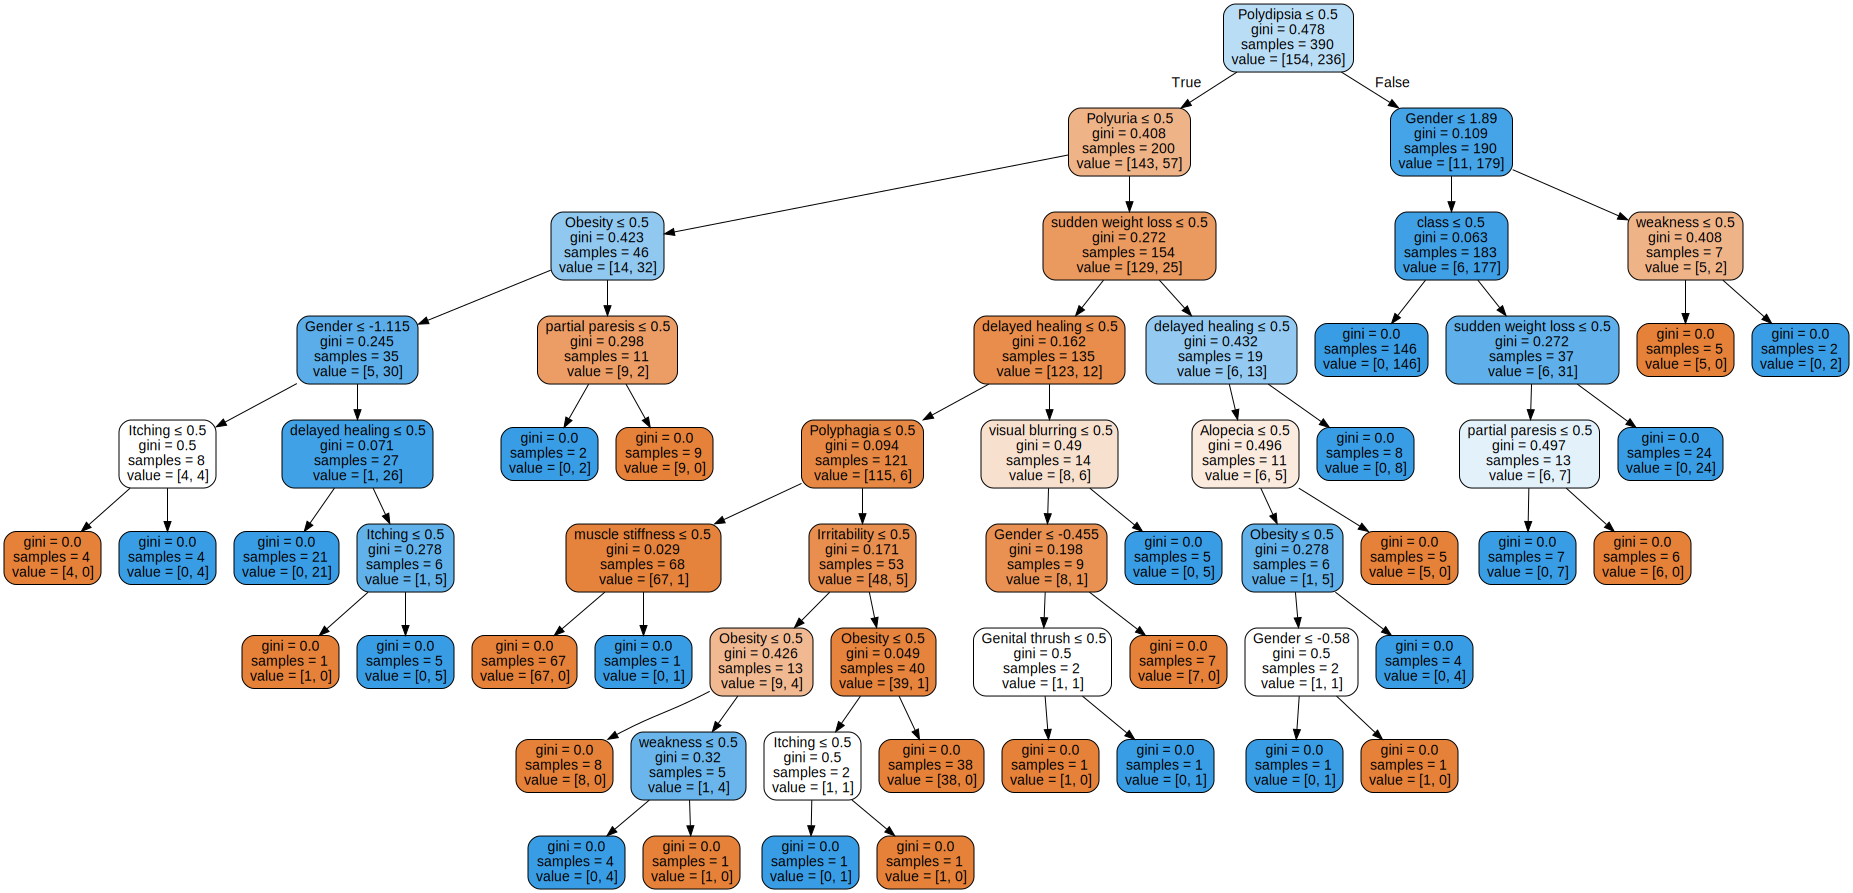

In [18]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=data_df.columns,
                                filled = True, rounded = True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [19]:
reg_data_df = pd.read_csv('Real estate.csv')

reg_data_df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [138]:
from sklearn.metrics import mean_squared_error

reg_data_df.drop(['No'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(reg_data_df.iloc[:,:-1], reg_data_df['Y house price of unit area'], random_state = 42)

tree_reg = tree.DecisionTreeRegressor(criterion='poisson')
tree_reg = tree_reg.fit(X_train, y_train)
y_hat = tree_reg.predict(X_test)

print(f"Model MSE Score: {np.round(mean_squared_error(y_test, y_hat),2)}")



(104, 7)
(104,)
Model MSE Score: 73.6
